In [9]:
import numpy as np
from numpy.linalg import norm
import numpy as np
from numpy import array, zeros
import datetime
import matplotlib.pyplot as plt
import os
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import pyplot as plot
from scipy.optimize import leastsq, curve_fit
import scipy.optimize
import pylab as plt2
from math import atan2
from scipy.special import erf
import seaborn as sns
#%matplotlib inline

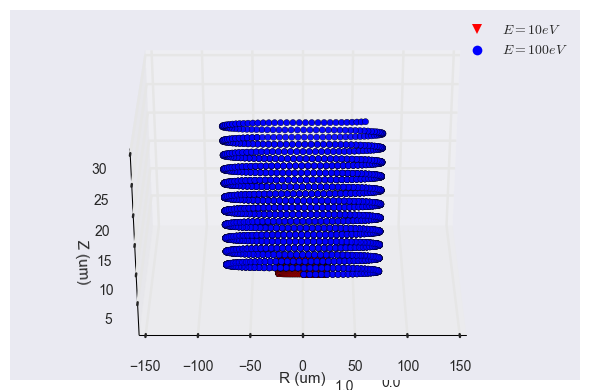

In [10]:
plt.figure(1)
plt.show()

In [ ]:
"""
total_time = 0.
dt = 1e-11
v = np.array([100.,0.,0.])
B = np.array([0.,0.,5.e-4])
pos = [np.array([0.,0.,0.])]
list_pos=[]
list_vels=[]


q = 1.6*1e-19 #C
m = 9.31*1e-31
def calculate_acceleration(v):
    return q*np.cross(v,B)/m
    

while total_time<7e-8:
    vNplusHalf = v + 0.5*dt*calculate_acceleration(v)
    #print vNplusHalf
    pos = pos + dt*vNplusHalf
    v = vNplusHalf + 0.5*dt*calculate_acceleration(vNplusHalf)
    
    total_time += dt
    list_pos.append(pos)
    list_vels.append(v)
    
plt.plot(np.array(list_pos)[:,0][:,0],np.array(list_pos)[:,0][:,1])
plt.show()
"""

# Calculate for Gauss density infinite cylinder case

In [2]:
def simulate_el_trajec(total_time_of_simulation,v,pos,rho0,dt):

    total_time = 0.
    #dt = 1e-14
    #v = np.array([0.,100.,0.])
    #B = np.array([0.,0.,5.e-4])
    #pos = np.array([0.,50*1e-6,0.])
    list_pos=[]
    list_vels=[]
    list_times=[]
    list_elecField=[]
    list_bField=[]
    list_fZ=[]
    list_theta=[]
    list_accels=[]
    list_radius=[]
    list_kinEnergy=[]
    list_totEnergy=[]
    
    q = -1.6*1e-19 #C
    m = 9.31*1e-31
    ##### E calculation ####
    epsilon0 = 8.85*1e-12
    beta = 1.
    c = 3*1e8
    r0 = 200*1e-6
    ####B calculation ####
    mu0 = 4*np.pi*1e-7
    #rho0 = 1. #for gaussian profile
    #total_time_of_simulation = .8e-9
    sigma_r = 200.e-6
    def calculate_acceleration(v,pos1):

        #radial_distance = np.sqrt(((pos1)*(pos1)).sum())
        radial_distance = np.sqrt((pos[:2]**2).sum())

        exponential_term = np.exp(-1.*radial_distance*radial_distance/(2.*sigma_r*sigma_r))
        Eradial = (rho0/epsilon0)*(sigma_r*sigma_r/radial_distance)*(1. - exponential_term)

        #Btheta = radius*(mu0/(2*np.pi))
        Btheta = Eradial*beta/c

        theta = np.arctan2((pos1[1]),(pos1[0])) #in radians
        #print 'theta (deg): '+str(theta*np.pi/180)
        E = np.array([Eradial*np.cos(theta),Eradial*np.sin(theta),0.]) #Ex,Ey,Ez

        #############
        #Included signs in electric field
        signs_positions = np.sign(pos1)
        #############

        B = np.array([Btheta*np.sign(pos1[1]),-1.*Btheta*np.cos(theta),0.])

        acceleration = q*(E + np.cross(v,B))/m
        Fmag= q*np.cross(v,B)/m
        #print acceleration.shape
        return acceleration,B,E,Fmag,theta,radial_distance

    t0 = datetime.datetime.now()
    while total_time<total_time_of_simulation:
        #print 'total time :' + str(total_time)
        posNplusHalf = pos + 0.5*dt*v
        #print vNplusHalf
        a,B,E,Fmag,theta,rad = calculate_acceleration(v,posNplusHalf)
        v = v + dt*a
        pos = posNplusHalf + 0.5*dt*v
        gamma_calc = 1./np.sqrt(1 - ((np.sqrt((v[1:]**2).sum())/c)**2))
        kineticEnergy = (gamma_calc-1)*(.511)*1e6 #in eV
        totalEnergy = (gamma_calc)*(.511)*1e6 #in eV
        total_time += dt
        list_pos.append(pos)
        list_vels.append(v)
        list_times.append(total_time)
        list_elecField.append(E)
        list_bField.append(B)
        list_fZ.append(Fmag)
        list_theta.append(theta)
        list_accels.append(a)
        list_radius.append(rad)
        list_kinEnergy.append(kineticEnergy)
        list_totEnergy.append(totalEnergy)


    print 'total iterations: '+str(len(list_pos))
    print 'time elapsed: '+str(datetime.datetime.now()-t0)
    print 'investigate B field'
    
    return list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinEnergy,list_totEnergy


In [3]:
total_time_of_simulation=1e-9
v = np.array([0.,5.934e6,0.])#100 eV
#v = np.array([0.,1.238e8,0.])#50keV 
pos=np.array([0.,1*1e-6,0.])
rho0=0.64
dt=1.e-14
list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinetic,list_total = simulate_el_trajec(total_time_of_simulation,v,pos,rho0,dt)
######
#v1 = np.array([0.,5.934e6,0.])#1keV
v1 = np.array([0.,1.877e6,0.])#10eV 
pos1=np.array([0.,1*1e-6,0.])
list_posb,list_velsb,list_timesb,list_elecFieldb,list_bFieldb,list_fZb,list_thetab,list_accelsb,list_radiusb,list_kineticb,list_totalb = simulate_el_trajec(total_time_of_simulation,v1,pos1,rho0,dt)
##
#v2 = np.array([0.,1.238e8,0.])#50keV
#pos2=np.array([0.,150*1e-6,0.])
#list_posc,list_velsc,list_timesc,list_elecFieldc,list_bFieldc,list_fZc,list_thetac,list_accelsc,list_radiusc,list_kineticc,list_totalc = simulate_el_trajec(total_time_of_simulation,v2,pos2,rho0,dt)
##
#v3 = np.array([0.,1.645e8,0.])#100keV
#v3 = np.array([0.,1.326e7,0.])#500ev
#pos3=np.array([0.,150*1e-6,0.])
#list_posd,list_velsd,list_timesd,list_elecFieldd,list_bFieldd,list_fZd,list_thetad,list_accelsd,list_radiusd,list_kineticd,list_totald = simulate_el_trajec(total_time_of_simulation,v3,pos3,rho0,dt)


total iterations: 100001
time elapsed: 0:00:09.691693
investigate B field
total iterations: 100001
time elapsed: 0:00:10.492789
investigate B field


In [ ]:
# Varying initial positions, same .5 keV velocity
total_time_of_simulation=2e-9
v = np.array([0.,1.326e7,0.])#500ev
#v = np.array([0.,1.238e8,0.])#50keV 
pos=np.array([0.,150*1e-6,0.])
rho0=0.64
dt=1.e-14
list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinetic,list_total = simulate_el_trajec(total_time_of_simulation,v,pos,rho0,dt)
######
"""
v1 = np.array([0.,1.326e7,0.])#500ev
pos1=np.array([0.,100*1e-6,0.])
list_posb,list_velsb,list_timesb,list_elecFieldb,list_bFieldb,list_fZb,list_thetab,list_accelsb,list_radiusb,list_kineticb,list_totalb = simulate_el_trajec(total_time_of_simulation,v1,pos1,rho0,dt)
##
v3 = np.array([0.,1.326e7,0.])#500ev
pos3=np.array([0.,50*1e-6,0.])
list_posd,list_velsd,list_timesd,list_elecFieldd,list_bFieldd,list_fZd,list_thetad,list_accelsd,list_radiusd,list_kineticd,list_totald = simulate_el_trajec(total_time_of_simulation,v3,pos3,rho0,dt)
"""


In [ ]:
plt.figure(1)
ax = plt.subplot(211)
plt.plot(np.array(list_timesd)*1e9,np.array(list_posd)[:,1]*1e6,label='50 um')
plt.plot(np.array(list_timesb)*1e9,np.array(list_posb)[:,1]*1e6,label='100 um')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,label='150 um')
#plt.plot(np.array(list_timesc)*1e9,np.array(list_posc)[:,1]*1e3,label='50 keV')
plt.grid()
plt.ylim([-300,300])
plt.xlim([0.,1.0])
plt.ylabel('Position r (um)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(212,sharex=ax)
plt.plot(np.array(list_timesd)*1e9,np.array(list_posd)[:,2]*1e6,label='50 um')
plt.plot(np.array(list_timesb)*1e9,np.array(list_posb)[:,2]*1e6,label='100 um')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e6,label='150 um')

#plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel('Time (ns)')
plt.ylabel('Position z (um)')
plt.xlim([0.,1.0])
plt.show()

plt.figure()
plt.plot(np.array(list_timesd)*1e9,np.array(list_posd)[:,0]*1e6,label='50 um')
plt.plot(np.array(list_timesb)*1e9,np.array(list_posb)[:,0]*1e6,label='100 um')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,0]*1e6,label='150 um')
#plt.plot(np.array(list_timesc)*1e9,np.array(list_posc)[:,1]*1e3,label='50 keV')
plt.grid()
plt.show()

In [ ]:
plt.figure(1)
ax = plt.subplot(211)
plt.plot(np.array(list_timesd)*1e9,np.array(list_posd)[:,1]*1e6,label='0.5 keV')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,label='1 keV')
plt.plot(np.array(list_timesb)*1e9,np.array(list_posb)[:,1]*1e6,label='10 keV')
#plt.plot(np.array(list_timesc)*1e9,np.array(list_posc)[:,1]*1e3,label='50 keV')
plt.grid()
plt.ylim([-500,500])
plt.xlim([0.,1.2])
plt.ylabel('Position r (um)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(212,sharex=ax)
plt.plot(np.array(list_timesd)*1e9,np.array(list_posd)[:,2]*1e6,label='0.5 keV')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e6,label='1 keV')
plt.plot(np.array(list_timesb)*1e9,np.array(list_posb)[:,2]*1e6,label='10 keV')

#plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel('Time (ns)')
plt.ylabel('Position z (um)')
plt.xlim([0.,1.2])
plt.show()

In [4]:
def calculate_beta_from_energy(kE):
    """
    E: kinectic energy in eV
    """
    gamma = (kE+.511*1e6)/(.511*1e6) #electron rest mass in eV
    beta = np.sqrt(1 - (1./(gamma*gamma)))
    return gamma,beta, "%.3e" % (beta*3.*1e8)

In [5]:
for energy in (10,25,50,100,150,200,300,500,750,1e3,1250,1500,1750,1e4,5e4,1e5,1e6,1e7,1e8):
    #print 'energy (eV): '+str(energy)
    print energy,calculate_beta_from_energy(energy)[2]

10 1.877e+06
25 2.967e+06
50 4.196e+06
100 5.934e+06
150 7.267e+06
200 8.391e+06
300 1.028e+07
500 1.326e+07
750 1.624e+07
1000.0 1.874e+07
1250 2.095e+07
1500 2.294e+07
1750 2.476e+07
10000.0 5.850e+07
50000.0 1.238e+08
100000.0 1.645e+08
1000000.0 2.823e+08
10000000.0 2.996e+08
100000000.0 3.000e+08


# Store positions of electron as arrays

In [ ]:
fig = plt.figure(1)
plt.grid()
limit = 100
num_imgs = 2
#for i,limit in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):
y = np.array(list_pos)[:,1]*1e6
z = np.array(list_pos)[:,2]*1e6
plt.scatter(z[:limit],y[:limit],color='b')
#plt.scatter(np.linspace(-10,10,1000),np.zeros(len(np.linspace(-10,10,1000))),color='black')
plt.scatter(np.linspace(-100,100,1000),np.ones(len(np.linspace(-10,10,1000)))*-200,color='black')
plt.scatter(np.linspace(-100,100,1000),np.ones(len(np.linspace(-10,10,1000)))*200,color='black')
plt.xlim([z.min(),0.])
plt.ylim([-300.,300.])
plt.xlabel('z position (um)')
plt.ylabel('radial position (um)')
plt.title('Electron propagation')

fig.show()
#plt.savefig(os.getcwd()+'/images_movie_frog/img%05d.png' % (i))

#ax.scatter(x, y, z, c=c)

In [6]:
def return_xs_ys_zs(list_pos1,limit2,stepper):
    
    ys = np.array(list_pos1)[:,1]*1e6
    zs = np.array(list_pos1)[:,2]*1e6
    xs = np.array(list_pos1)[:,0]*1e6

    ys = ys[:limit2][::stepper]
    zs = zs[:limit2][::stepper]
    xs = xs[:limit2][::stepper]

    return xs,ys,zs

def return_maxy_from_pos(p):
    list_max=[]
    for i in p:
        #get max,min
        list_max.append(np.array(i)[:,1].max())
    
    max1 = max(list_max)
    return max1

def return_min_max_z_from_pos(p):
    list_max=[]
    list_min=[]
    for i in p:
        #get max,min
        list_max.append(np.array(i)[:,2].max())
        list_min.append(np.array(i)[:,2].min())
    max1 = max(list_max)
    min1 = min(list_max)
    return max1,min1

def calculate_energy_from_velocity(v1):
    
    """
    E: kinectic energy in eV
    """
    c1=3.e8
    gamma = 1./np.sqrt(1 - (v1/c1)**2)
    energy1 = (gamma+1.)*(.511)*1e6
    

    return "%.3e" % (energy1)

In [25]:
fig1 = plt.figure(2)
limit2 = 10000
num_imgs = 10
ax1 = fig1.add_subplot(111, projection='3d',)
plt.gca().patch.set_facecolor('white')
#ax1.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
#ax1.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
#ax1.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

box = ax1.get_position()
#ax1.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
#plt.title('Electron propagation')
for i,limit2 in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):

    #ys = np.array(list_pos)[:,1]*1e6
    #zs = np.array(list_pos)[:,2]*1e6
    #xs = np.array(list_pos)[:,0]*1e6

    #ys = ys[:limit2][::200]
    #zs = zs[:limit2][::200]
    #xs = xs[:limit2][::200]

    positionsA = return_xs_ys_zs(list_pos,limit2,100)
    positionsB = return_xs_ys_zs(list_posb,limit2,100)
    #positionsC = return_xs_ys_zs(list_posc,limit2,100)
    #positionsD = return_xs_ys_zs(list_posd,limit2,100)


    ax1.scatter(positionsB[0],positionsB[1],positionsB[2],c='red',marker='o',label='teste')
    ax1.scatter(positionsA[0],positionsA[1],positionsA[2],c='blue',marker='o',label='teste')
    #ax1.scatter(positionsC[0],positionsC[1],positionsC[2],c='green',marker='o',label='teste')
    #ax1.scatter(positionsD[0],positionsD[1],positionsD[2],c='yellow',marker='o',label='teste')

    #ax2 = ax1.twiny()
    #ax1.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')
    #ax2.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')

    #ax1.scatter(xs, ys, zs, c=c, marker=m)

    #ax1.set_xlabel('X Label')
    ax1.set_ylabel('R (um)')
    ax1.set_zlabel('Z (um)')


    #plt.ylim([-250.,250.])
    #plt.ylim([-1*max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max()),
    #         max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max())])

    #plt.ylim([-1*return_maxy_from_pos([list_pos,list_posb])*1e6,
    #         return_maxy_from_pos([list_pos,list_posb])*1e6])
    



    ax1.set_zlim3d([min((np.array(list_pos)[:,2]*1e6).min(),(np.array(list_posb)[:,2]*1e6).min()),
    max((np.array(list_posb)[:,2]*1e6).max(),(np.array(list_pos)[:,2]*1e6).max())])
    #ax1.set_zlim3d([return_min_max_z_from_pos([list_pos,list_posb,list_posc])[1]*1e6,
    #                return_min_max_z_from_pos([list_pos,list_posb,list_posc])[0]*1e6])
    maxz = 2e3
    #ax1.set_zlim3d([-0.1,10])
    plt.ylim([-150.,150.])
    plt.xlim([-1.,1.])
    #turn off axis
    ax1.w_xaxis.line.set_lw(0.)
    ax1.set_xticks([])

    ax1.view_init(30, 0)


    # Shrink current axis's height by 10% on the bottom


    # Put a legend below current axis
    #legend
    colors = ['blue','red','green','yellow']
    scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
    scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'v')
    #scatter3_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[2], marker = 'o')
    #scatter4_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[3], marker = 'v')
    #ax1.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)
    ax1.legend([scatter2_proxy,scatter1_proxy],#,scatter3_proxy,scatter4_proxy],
               [r'$E = 10 eV$',r'$E = 100 eV$'],
               numpoints=1,loc='upper right')
              #bbox_to_anchor=(0.5,-0.05),fancybox=True,shadow=True,ncol=5)
    #[r'$r_0 = 50 \mu m$'],
    #ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

    fig1.tight_layout()        
    plt.savefig(os.getcwd()+'/images_thesis/img%05d.png' % (i),dpi = 80,bbox_inches='tight')
    fig1.show()


In [13]:
list_times_plot=[]
for i,limit2 in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):
    list_times_plot.append(list_times[limit2])
    print '%.2e' %list_times[limit2]
#len(range(1,len(list_pos),len(list_pos)/num_imgs))
#print (np.array(list_timesb) - np.array(list_times)).sum()
0,1,3,8,

2.00e-14
3.33e-10
6.67e-10
1.00e-09


(0, 1, 3, 8)

##### print min((np.array(list_pos)[:,2]*1e6).min(),(np.array(list_pos100_1e7)[:,2]*1e6).min())
#print max((np.array(list_pos100_1e7)[:,2]*1e6).max(),(np.array(list_pos)[:,2]*1e6).max())
print max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max())

In [ ]:
plt.plot(np.array(list_pos100_1e7)[:,2]*1e6)
plt.plot(np.array(list_pos100_1e7)[:,1]*1e6)
plt.show()

In [ ]:
plt.plot(np.array(list_pos)[:,2]*1e6)
plt.plot(np.array(list_pos)[:,1]*1e6)
plt.show()

In [ ]:
plt.plot(np.array(list_times)*1e9,np.array(list_fZ)[:,2],'r',label='f50')
plt.plot(np.array(list_times)*1e9,np.array(list_fZ100_1e7)[:,2],'black',label='f100')
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,2]*1e11,'b',label='v50')
plt.plot(np.array(list_times)*1e9,np.array(list_vels100_1e7)[:,2]*1e11,'g',label='v100')
plt.xlim([0.,0.2])
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,'g',label='z50')
plt.plot(np.array(list_times100_1e7)*1e9,np.array(list_pos100_1e7)[:,1]*1e6,'black',label='z100')
plt.show()

In [ ]:
calculate_energy_from_velocity(np.sqrt((list_velsb[0][2]**2).sum()))

In [ ]:
"""
def calculate_beta_from_energy(kE):
    
    E: kinectic energy in eV
    
    gamma = (kE+.511*1e6)/(.511*1e6) #electron rest mass in eV
    beta = np.sqrt(1 - (1./(gamma*gamma)))
    return gamma,beta, "%.3e" % (beta*3.*1e8)
"""    

In [ ]:
print calculate_beta_from_energy(10)#10eV
print calculate_beta_from_energy(1e4)#10keV
print calculate_beta_from_energy(1e5)#100kEv

In [ ]:
for energy1 in [10, 50, 100, 500, 1.e3, 5.e3, 10.e3]:
    print [energy1,calculate_beta_from_energy(energy1)]

In [ ]:
print 'kinectic energy conserved? total energy conserved?'
plt.plot(np.array(list_times)*1e9,np.array(list_kinetic)/1e6,label='kinectic',color='green')
plt.plot(np.array(list_times)*1e9,np.array(list_total)/1e6,label='total',color='red')
plt.ylabel('E (keV)')
plt.xlabel('time (ns)')
plt.legend()
plt.show()

In [ ]:
fig1 = plt.figure(2)
limit2 = 10000
num_imgs = 3
ax1 = fig1.add_subplot(111, projection='3d',)
box = ax1.get_position()
#ax1.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
plt.title('Electron propagation')
for i,limit2 in enumerate(range(1,len(list_pos),len(list_pos)/num_imgs)):

    #ys = np.array(list_pos)[:,1]*1e6
    #zs = np.array(list_pos)[:,2]*1e6
    #xs = np.array(list_pos)[:,0]*1e6

    #ys = ys[:limit2][::200]
    #zs = zs[:limit2][::200]
    #xs = xs[:limit2][::200]

    positionsA = return_xs_ys_zs(list_pos,limit2,200)
    positionsB = return_xs_ys_zs(list_posb,limit2,200)
    positionsC = return_xs_ys_zs(list_posc,limit2,200)
    positionsD = return_xs_ys_zs(list_posd,limit2,200)

    ax1.scatter(positionsA[0],positionsA[1],positionsA[2],c='blue',marker='o',label='teste')
    ax1.scatter(positionsB[0],positionsB[1],positionsB[2],c='red',marker='o',label='teste')
    ax1.scatter(positionsC[0],positionsC[1],positionsC[2],c='green',marker='o',label='teste')
    ax1.scatter(positionsD[0],positionsD[1],positionsD[2],c='yellow',marker='o',label='teste')

    #ax2 = ax1.twiny()
    #ax1.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')
    #ax2.scatter(xsb,ysb,zsb,c='r',marker='o',label='teste1')

    #ax1.scatter(xs, ys, zs, c=c, marker=m)

    #ax1.set_xlabel('X Label')
    ax1.set_ylabel('R (um)')
    ax1.set_zlabel('Z (um)')

    #plt.zlim([z.min(),0.])
    #plt.ylim([-250.,250.])
    #plt.ylim([-1*max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max()),
    #         max((np.array(list_posb)[:,1]*1e6).max(),(np.array(list_pos)[:,1]*1e6).max())])

    plt.ylim([-1*return_maxy_from_pos([list_pos,list_posb,list_posc])*1e6,
             return_maxy_from_pos([list_pos,list_posb,list_posc])*1e6])



    #ax1.set_zlim3d([min((np.array(list_pos)[:,2]*1e6).min(),(np.array(list_posb)[:,2]*1e6).min()),
    #max((np.array(list_posb)[:,2]*1e6).max(),(np.array(list_pos)[:,2]*1e6).max())])
    ax1.set_zlim3d([return_min_max_z_from_pos([list_pos,list_posb,list_posc])[1]*1e6,
                    return_min_max_z_from_pos([list_pos,list_posb,list_posc])[0]*1e6])

    #turn off axis
    ax1.w_xaxis.line.set_lw(0.)
    ax1.set_xticks([])

    ax1.view_init(30, 0)
    plt.xlim([-1.,1.])

    # Shrink current axis's height by 10% on the bottom


    # Put a legend below current axis
    #legend
    colors = ['blue','red','green','yellow']
    scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
    scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'v')
    scatter3_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[2], marker = 'o')
    scatter4_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[3], marker = 'v')
    #ax1.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)
    ax1.legend([scatter1_proxy,scatter2_proxy,scatter3_proxy,scatter4_proxy],
               [r'$E = 10 eV$',r'$E = 1 keV$',r'$E = 10 keV$',r'$E = 100 keV$'],
               numpoints=1,loc='upper right')
              #bbox_to_anchor=(0.5,-0.05),fancybox=True,shadow=True,ncol=5)
    #[r'$r_0 = 50 \mu m$'],
    #ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

    fig1.tight_layout()        
    plt.savefig(os.getcwd()+'/images_thesis/img%05d.png' % (i),dpi = 80,bbox_inches='tight')
    fig1.show()


In [ ]:
fig = plt.figure(4)
ax1 = plt.subplot(211)
plt.title('Electron trajectory - 1 keV')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,'g',label='r')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e6,'b',label='z')
plt.ylabel(r'$\mu m$')
plt.xlabel('time (ns)')
plt.legend()
##
ax2 = plt.subplot(212)
plt.plot(np.array(list_times)*1e9,np.array(list_kinetic),'r',label='kinetic energy')
#plt.scatter(np.array(list_times)[::1000]*1e9,np.array(list_kinetic)[::1000],color='r')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
list_kinetic[0]

In [ ]:
# Try to fit sine curve and see if frequency changes
data = np.array(list_posd)[:,1]*1e6
#plt.plot(np.array(list_timesd)*1e9,np.array(list_posd)[:,2]*1e6,label='50 um')
#plt.plot(np.array(list_timesb)*1e9,np.array(list_posb)[:,2]*1e6,label='100 um')
#plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e6,label='150 um')


In [ ]:
N = data.shape[0] # number of data points
t = np.linspace(0, 4*np.pi, N)
#data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = 200.
guess_std = 200.
guess_phase = 0
parm1 = 10.

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = 200*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.cos(x[3]*t+x[1]) + x[2] - data
est_std, est_phase, est_mean,est_parm1 = leastsq(optimize_func, [guess_std, guess_phase, guess_mean,parm1])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_std*np.sin(est_parm1*t+est_phase) + est_mean

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

# Orbit radius vs energy

In [ ]:
total_time_of_simulation=3e-9
pos=np.array([0.,1.e-9,0.])
rho0=0.64
list_pos_store=[]
dt=1.e-14
list_vels = [1.877e6,2.967e6,4.196e6,5.934e6,7.267e6,8.391e6,1.028e7,1.326e7,1.624e7,1.874e7,2.095e7,2.294e7,2.476e7,5.850e7]
list_energies = [10, 25,50,100,150,200,300,500,750,1000,1250,1500,1750,10000]
                                  
for index1,vy in enumerate(list_vels):
    print 'item # %d' %(index1)
    #v = np.array([0.,5.85e7,0.])#10keV 
    v = np.array([0.,vy,0.])

    list_pos,list_vels,list_times,list_elecField,list_bField,list_fZ,list_theta,list_accels,list_radius,list_kinetic,list_total = simulate_el_trajec(total_time_of_simulation,v,pos,rho0,dt)
    list_pos_store.append(list_pos)
######
"""
v1 = np.array([0.,1.874e7,0.])#10keV
pos1=np.array([0.,150*1e-6,0.])
list_posb,list_velsb,list_timesb,list_elecFieldb,list_bFieldb,list_fZb,list_thetab,list_accelsb,list_radiusb,list_kineticb,list_totalb = simulate_el_trajec(total_time_of_simulation,v1,pos1,rho0,dt)
##
v2 = np.array([0.,1.238e8,0.])#50keV
pos2=np.array([0.,150*1e-6,0.])
list_posc,list_velsc,list_timesc,list_elecFieldc,list_bFieldc,list_fZc,list_thetac,list_accelsc,list_radiusc,list_kineticc,list_totalc = simulate_el_trajec(total_time_of_simulation,v2,pos2,rho0,dt)
##
#v3 = np.array([0.,1.645e8,0.])#100keV
v3 = np.array([0.,1.326e7,0.])#500ev
pos3=np.array([0.,150*1e-6,0.])
list_posd,list_velsd,list_timesd,list_elecFieldd,list_bFieldd,list_fZd,list_thetad,list_accelsd,list_radiusd,list_kineticd,list_totald = simulate_el_trajec(total_time_of_simulation,v3,pos3,rho0,dt)
"""

In [ ]:
fig = plt.figure(4)
ax1 = plt.subplot(211)
plt.title('Electron trajectory - 1 keV')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]*1e6,'g',label='r')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]*1e6,'b',label='z')
plt.ylabel(r'$\mu m$')
plt.xlabel('time (ns)')
plt.legend()
##
ax2 = plt.subplot(212)
plt.plot(np.array(list_times)*1e9,np.array(list_kinetic),'r',label='kinetic energy')
#plt.scatter(np.array(list_times)[::1000]*1e9,np.array(list_kinetic)[::1000],color='r')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(1)
plt.plot(np.array(list_pos)[:,1]*1e6)
plt.show()

In [ ]:
"""
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
"""

In [ ]:
"""
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)

plt.show()
"""

In [ ]:
list_for_plot = []
for list_pos1,energy1 in zip(list_pos_store,list_energies):
    meanvalue = 0.5*(abs((np.array(list_pos1)[:,1]*1e6)).min()+abs((np.array(list_pos1)[:,1]*1e6)).max())
    print 'energy : %d, mean value %d ' % (energy1,meanvalue)
    list_for_plot.append([energy1,meanvalue])
#10eV, 50eV, 100 eV, 500 eV, 1 keV, 5 keV, 10 keV

In [ ]:
orbits = np.array([[10,12], 
 [50,  27 ],
 [100, 39 ],
 [500, 91 ],
 [1000, 136 ],
[ 5000, 609 ],
[ 10000, 3211 ]])
orbits = np.array(list_for_plot)


In [ ]:
fig = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(orbits[:,0],orbits[:,1]/1e3,label='um')
plt.xlabel('Energy (eV)')
plt.ylabel('Radius (mm)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Radius of oscillation - secondary electrons')
plt.xlim([-100,2100])
plt.ylim([-0.001,0.25])
plt.tight_layout()
#plt.grid()
plt.show()

In [ ]:
plt.figure(1)
#plt.subplot(211)
plt.scatter(orbits[:,0],orbits[:,1],s=100)
ax = sns.regplot(x=orbits[:,0], y=orbits[:,1],order=2,ci=None, color="g",label='order 1 fit')
#plt.subplot(212)
plt.xlabel('Energy (eV)')
plt.ylabel('Radius (mm)')
ax = sns.regplot(x=orbits[:,0], y=orbits[:,1],order=1,ci=None, color="b",label='order 2 fit')
plt.title('Radius of oscillation - secondary electrons')
plt.legend()
plt.show()

In [ ]:
# Importing numpy array
with open('export.txt') as f:
    x=f.readlines()
x = x[1:]

In [ ]:
list_from_geant4=[]
for i in x:
    b=i.split(' ')
    list_from_geant4.append([np.double(b[0]),np.double(b[1][:-1])])


In [ ]:
plt.scatter(np.array(list_from_geant4)[:,0],np.array(list_from_geant4)[:,1])

In [ ]:
# Plotting both together
fig, ax1 = plt.subplots()
##
#ax1.set_xlim([-100,2500])
ax1.set_ylabel('Radius (mm)')
ax1.set_xlabel('Energy (eV)')
ax1.set_xlim([0.,2000.])

ax2 = ax1.twinx()

ax1.scatter(orbits[:,0],orbits[:,1]/1e3,label='Electron oscillation',color='r')

ax2.plot(np.array(list_from_geant4)[:,0],np.array(list_from_geant4)[:,1]/55210 * 100,
         label='Number of collisions',color='blue')
ax2.set_ylabel('%')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=4)
#ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax1.legend(h1+h2,l1+l2,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)

# change colors
ax1.spines['left'].set_color('red')
#ax1.spines['top'].set_color('red')
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')

ax2.spines['left'].set_color('blue')
#ax1.spines['top'].set_color('red')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax1.set_ylim([0.,0.25])
ax2.set_ylim([0.,100])
ax2.set_xlim([-50.,2500])

#ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 8))
#ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))

ax2.grid()
plt.tight_layout()
#plt.legend()
plt.show()

In [ ]:
V = .154**2 *1e-2*np.pi #cm3
print V

In [ ]:
# Fitting the radius of electron trajectory
fig = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(orbits[:,0],orbits[:,1]/1e3,label='um')
plt.xlabel('Energy (eV)')
plt.ylabel('Radius (mm)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Radius of oscillation - secondary electrons')
plt.xlim([-100,2100])
plt.ylim([-0.001,0.25])
plt.tight_layout()
#plt.grid()
plt.show()

In [ ]:
def func(x, a, c):
    #return a*np.exp(-c*x)+d
    #return a*np.exp(c/x) + d
    return a*(np.log(c*x))

In [ ]:
#orbits[:,0][:-1]
orbits[:,1][:-1]

In [ ]:
x = orbits[:,0][:-1]
y = orbits[:,1][:-1]/1e3
popt, pcov = curve_fit(func, x, y, p0=(1., 1e-3))
#popt,pcov = curve_fit(func,  x,  y,(4,0.1))
print popt,pcov
print 'popt'
print popt

In [ ]:
yy = func(x, *popt)
print 'error: %.2e' %(((y-yy)**2).sum())

In [ ]:
plt.figure()
plt.plot(x, y, 'ko', label="Simulated Data")
a=-0.24611881
c=0.00067966  
d=0.26596443
plt.plot(x, a*np.exp(-c*x)+d, 'r-', label=r"Fitted Curve $y = a \cdot \log{(bx)}$")
#plt.xlim([-10,2500])
#plt.ylim([-0.1,1.0])
plt.xlabel('Energy (eV)')
plt.ylabel('Radius (mm)')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=2)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(1)
plt.scatter(x, y, 'ko', label="Simulated Data")
plt.plot(x, a, 'r-', label=r"Fitted Curve $y = a \cdot e^{-b*x}$")
-0.24611881  0.00067966  0.26596443

In [ ]:
erf(1./np.sqrt(2))

In [ ]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [ ]:
a = makeGaussian(100,fwhm=2.355*200*1e-6,center=None)

In [ ]:
mean = [0, 0]
cov = [[200e-6, 0], [0, 200e-6]] 
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y)
plt.axis('equal')
plt.show()

In [ ]:
plt.hist(y,bins=100)
plt.show()

In [ ]:
#np.random.seed(20)
t0 = datetime.datetime.now()
num_balls = 2e6
sigma = 200.e-6
count1=0.
for j in range(int(num_balls)):
    x = np.random.normal(0,sigma)
    y = np.random.normal(0,sigma)
    #if abs(x)<=sigma and abs(y)<=sigma:
    if np.sqrt(x**2 + y**2)<=sigma: 
        count1 += 1

result = count1/num_balls
print 'num_balls: '+str(num_balls)
print 'count1: '+str(count1)
print 'result : '+str(result)
print 'elapsed: '+str(datetime.datetime.now()-t0 )

In [20]:
fig1.dpi

72.0

In [ ]:
'%.2e' %(1.134*1e13/(6.25))

In [ ]:
1.81*1e12/(7*1e14) * 100